In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

c:\Users\hamin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"adult.csv")

In [15]:
population = df[['fnlwgt']].values
population.shape

(32561, 1)

In [23]:
population = population.flatten()

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Count'>

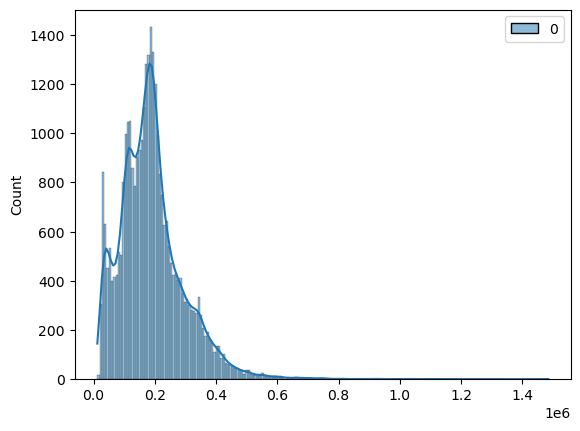

In [18]:
sns.histplot(population, kde=True, color='skyblue')

In [19]:
true_mean = population.mean()
print(true_mean)

189778.36651208502


We can see that the income is right skewed and is not normally distributed for the population

In [24]:
population

array([ 77053, 132870, 186061, ..., 154374, 151910, 201490], dtype=int64)

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

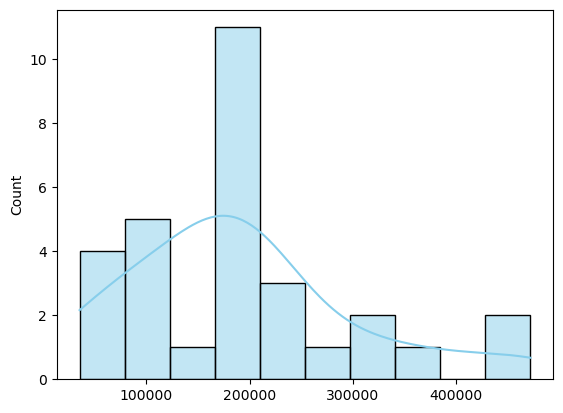

In [25]:
# Randomly select 30 values from the population as a sample
sample = np.random.choice(population, size=30, replace=False)
sns.histplot(sample, kde=True, color='skyblue', bins= 10)

We can also see that even with n>30, the sample distribution is not normally distributed

# Central Limit Theorem

1. Collect R samples size n
2. Calculate the mean of each sample
3. If n is large enough, the sampling distribution (distribution of the mean calculated in step 2) will be normally ditributed

In [26]:
def central_limit_theorem(population, num_values, Boostrap = False):
# Initialize an empty list to store means
    means = []


    # Number of loops
    num_loops = 1000

    # Number of values to select in each loop
    num_values = num_values

    for _ in range(num_loops):
        # Randomly select 5 values from the array
        random_selection = np.random.choice(population, size=num_values, replace=Boostrap)
        # Calculate the mean of the selected values
        mean = np.mean(random_selection)
        # Append the mean to the list
        means.append(mean)

    # Convert the list of means to a numpy array
    means = np.array(means)
    sampling_mean = means.mean()
    sampling_se = means.std()

    print(F"The estimated mean is {sampling_mean}") 
    print(F"The se is {sampling_se}") 

    # Plot the means using Seaborn
    plt.figure(figsize=(10, 6))
    sns.histplot(means, kde=True, color='skyblue')
    plt.title(f'Means of {num_values} Randomly Selected Values')
    plt.xlabel('Mean')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

The estimated mean is 187767.7976
The se is 44440.27828233116


c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


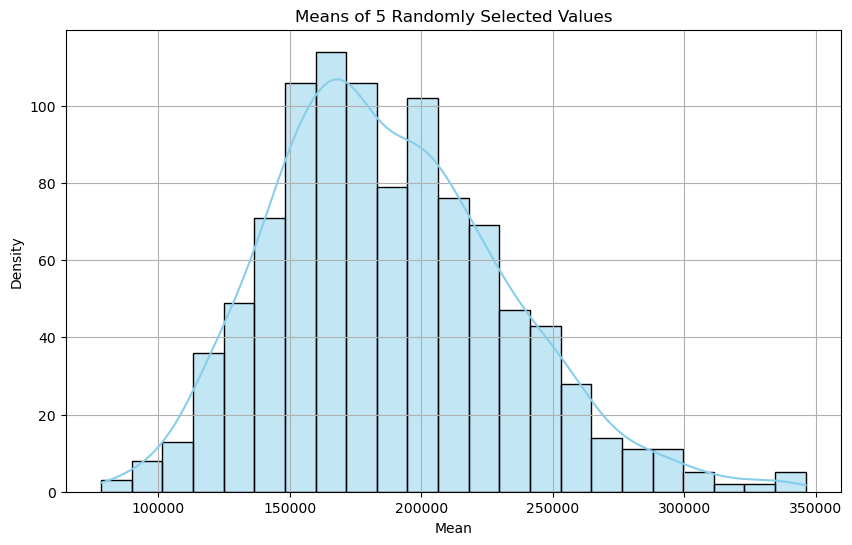

In [27]:
central_limit_theorem(population, 5)

The estimated mean is 189371.70410000003
The se is 24820.813742478673


c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


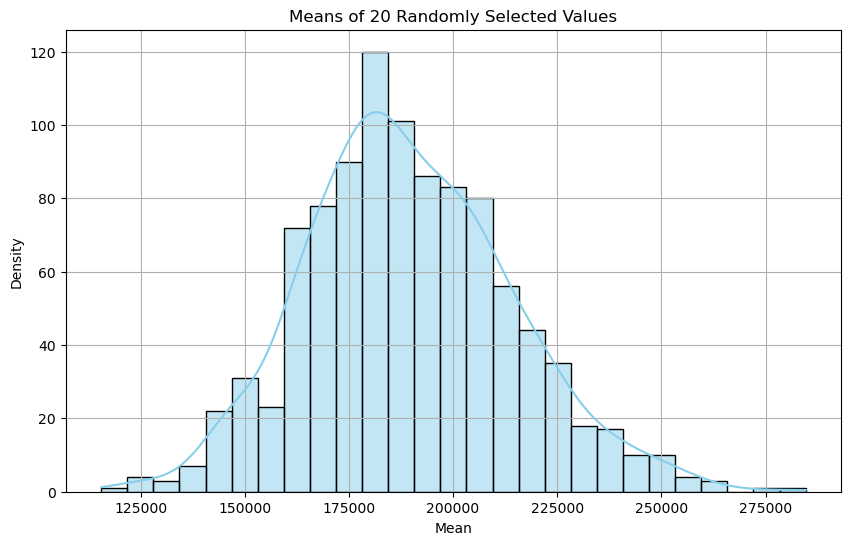

In [28]:
central_limit_theorem(population, 20)

The estimated mean is 188247.42516666668
The se is 18795.236763649482


c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


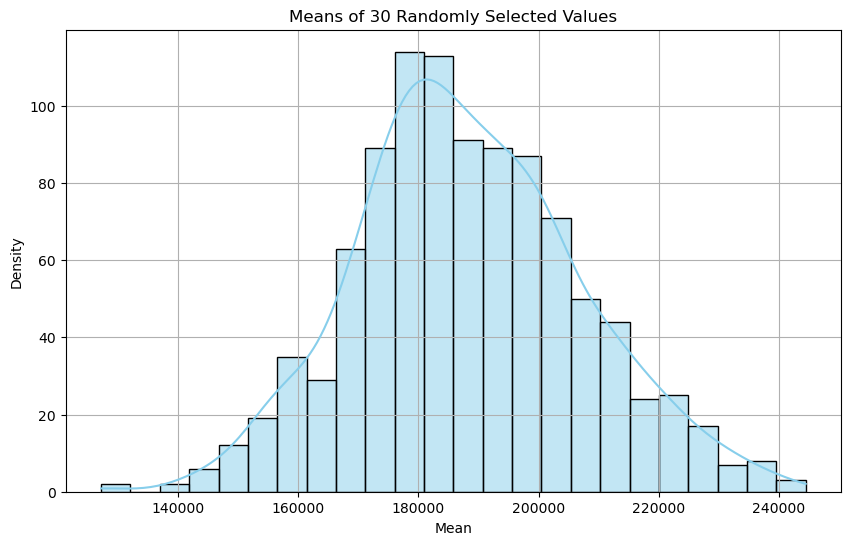

In [29]:
central_limit_theorem(population=population, num_values=30)

The estimated mean is 189631.552854
The se is 3269.131673118419


c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


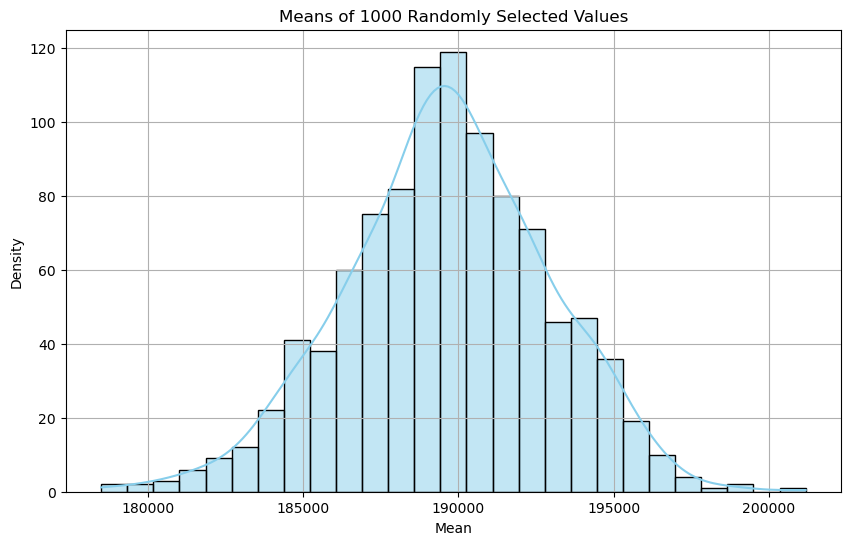

In [43]:
central_limit_theorem(population=population, num_values=1000)

# Bootstrapping

Let say we have a sample n = 30, it will cost you more time and money to collect multiple samples to understand the sampling distribution. But we can estimate it using boostrapping and CLT
* Boostrapping: Resampling with replacement
* Resample the original sample (n=30) will get you infinity different samples, and we can estimate the sampling disitribution using these samples

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


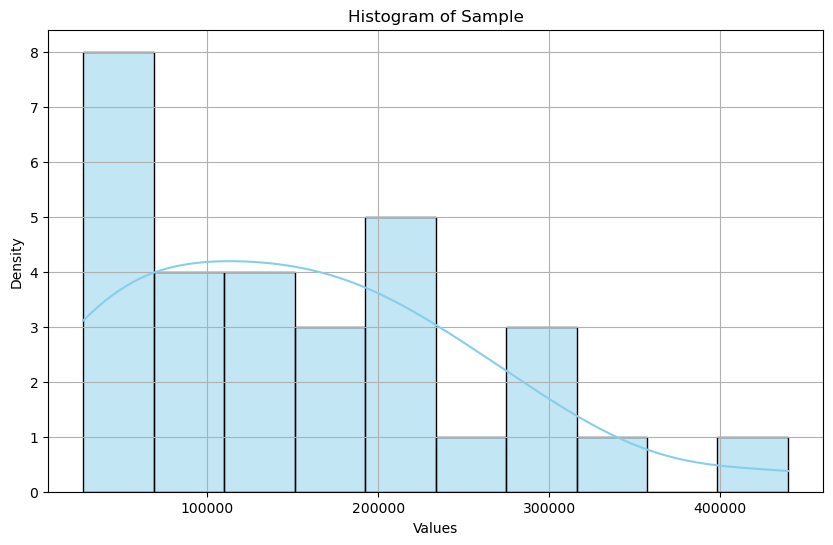

In [31]:
# Randomly select 5 values from the array
np.random.seed(42)  # Set seed before each random selection
sample = np.random.choice(population, size=30, replace=False)

# Plot the sample using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(sample, kde=True, color='skyblue', bins=10)
plt.title('Histogram of Sample')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [32]:
sample

array([280618, 439779, 204734, 107991,  54152, 240323, 279196,  48123,
       166481, 129042, 100651,  35854, 280570, 204160, 195949,  27433,
        91964,  30244,  48343, 231714, 152900,  98092, 181772,  38251,
       117983,  28791, 143910, 340476, 202570, 142717], dtype=int64)

In [33]:
sample.std()/np.sqrt(len(sample))

18516.49053431682

The estimated mean is 154316.3569
The se is 18598.29700656957


c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


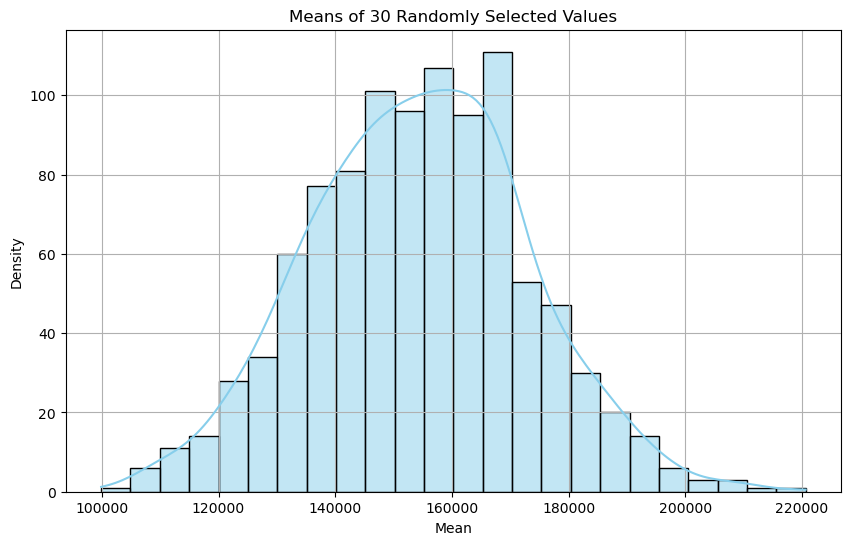

In [34]:
central_limit_theorem(sample, len(sample), True)

# Confidence Interval

## Using Definition
1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(1 – [x/100]) / 2]% of the R resample results from either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

In [35]:
# using code

In [36]:
sample

array([280618, 439779, 204734, 107991,  54152, 240323, 279196,  48123,
       166481, 129042, 100651,  35854, 280570, 204160, 195949,  27433,
        91964,  30244,  48343, 231714, 152900,  98092, 181772,  38251,
       117983,  28791, 143910, 340476, 202570, 142717], dtype=int64)

In [37]:
# Define the number of resamples (R)
R = 1000

# Define the confidence level
confidence_level = 95  # 95% confidence interval

# Define the size of each resample
n = len(sample)

# Initialize an array to store the statistics of interest for each resample
resample_statistics = np.zeros(R)

# Perform bootstrapping
for i in range(R):
    # Draw a random sample with replacement from the original data
    resample = np.random.choice(sample, size=n, replace=True)
    # Calculate the statistic of interest (mean in this case) for the resample
    resample_statistics[i] = np.mean(resample)

# Calculate the lower and upper bounds of the confidence interval
alpha = (100 - confidence_level) / 2
lower_bound = np.percentile(resample_statistics, alpha)
upper_bound = np.percentile(resample_statistics, 100 - alpha)

# Print the confidence interval
print(resample_statistics.mean())
print(f"Bootstrap {confidence_level}% confidence interval for the mean: [{lower_bound}, {upper_bound}]")

154721.40853333334
Bootstrap 95% confidence interval for the mean: [121042.46166666666, 193497.52666666667]


## Using Estimation formula

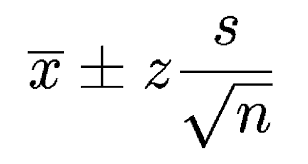

In [38]:
x_bar = sample.mean()
x_bar

154826.1

In [39]:
se = sample.std()/(np.sqrt(len(sample)))
se

18516.49053431682

In [40]:
upper_bound = (1.96*se)+x_bar
lower_bound = (-1.96*se) +x_bar

In [41]:
upper_bound

191118.42144726097

In [42]:
lower_bound

118533.77855273904